# Chapter 12: Functions of Multiple Random Variables

In previous chapters, we explored single random variables and then pairs or groups of random variables (joint distributions, covariance, correlation). Now, we take the next step: what happens when we combine multiple random variables using mathematical functions? 

For example, if $X$ represents the revenue from product A and $Y$ represents the revenue from product B, we might be interested in the distribution of the total revenue $Z = X + Y$. Or, if $X$ and $Y$ are coordinates, we might want to know the distribution of the distance from the origin, $R = \sqrt{X^2 + Y^2}$.

This chapter explores methods for finding the distributions of such combined variables, focusing on sums, differences, products, ratios, general transformations, and order statistics. We'll see how theoretical results can be derived and how simulation can provide empirical insights, especially when analytical solutions are complex.

## Distributions of Sums, Differences, Products, and Ratios

One of the most common operations is finding the distribution of the sum of two or more random variables.

### Sums of Independent Random Variables

Let $X$ and $Y$ be two independent random variables, and let $Z = X + Y$. Finding the distribution of $Z$ involves a technique called **convolution**.

* **Discrete Case:** If $X$ and $Y$ are discrete with PMFs $p_X(k)$ and $p_Y(k)$, the PMF of $Z = X + Y$ is given by the convolution formula:
    $$P(Z=z) = p_Z(z) = \sum_{k} P(X=k, Y=z-k)$$ 
    Since $X$ and $Y$ are independent, $P(X=k, Y=z-k) = P(X=k)P(Y=z-k) = p_X(k)p_Y(z-k)$. Therefore:
    $$p_Z(z) = \sum_{k} p_X(k) p_Y(z-k)$$ 
    The sum is over all possible values $k$ for $X$.
    
    *Example:* If $X \sim Poisson(\lambda_1)$ and $Y \sim Poisson(\lambda_2)$ are independent, then $Z = X+Y \sim Poisson(\lambda_1 + \lambda_2)$.

* **Continuous Case:** If $X$ and $Y$ are continuous with PDFs $f_X(x)$ and $f_Y(y)$, the PDF of $Z = X + Y$ is given by the convolution integral:
    $$f_Z(z) = \int_{-\infty}^{\infty} f_X(x) f_Y(z-x) \, dx$$ 
    Alternatively, you can swap the roles of X and Y: $f_Z(z) = \int_{-\infty}^{\infty} f_X(z-y) f_Y(y) \, dy$.
    
    *Example:* If $X \sim N(\mu_1, \sigma_1^2)$ and $Y \sim N(\mu_2, \sigma_2^2)$ are independent, then $Z = X+Y \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$.
    *Example:* If $X \sim Uniform(0, 1)$ and $Y \sim Uniform(0, 1)$ are independent, then $Z = X+Y$ has a **triangular distribution** on $(0, 2)$. We will simulate this later.

### Differences, Products, and Ratios

Finding the distributions for differences ($Z=X-Y$), products ($Z=XY$), or ratios ($Z=X/Y$) can also be done using transformations or convolution-like methods, but the formulas can become more complex.

* **Difference:** $Z = X - Y = X + (-Y)$. If you know the distribution of $-Y$, you can use convolution.
* **Product/Ratio:** These often require the method of transformations (discussed next) or using cumulative distribution functions ($F_Z(z) = P(Z \le z) = P(X/Y \le z)$ and then differentiating to find the PDF $f_Z(z)$).

For many complex functions or when analytical derivation is intractable, simulation becomes a powerful tool to approximate the resulting distribution.

## Introduction to Multivariate Transformations

Suppose we have a pair of random variables $(X, Y)$ with a known joint PDF $f_{X,Y}(x, y)$. We define two new random variables $U = g_1(X, Y)$ and $V = g_2(X, Y)$. How do we find the joint PDF of $(U, V)$, denoted $f_{U,V}(u, v)$?

This requires a technique analogous to the change of variables in multivariable calculus, using the **Jacobian** of the transformation.

1.  **Solve for Original Variables:** Express $x$ and $y$ in terms of $u$ and $v$: $x = h_1(u, v)$ and $y = h_2(u, v)$.
2.  **Calculate the Jacobian Determinant:** The Jacobian determinant $J$ is:
    $$ J = \det \begin{pmatrix} \frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} \\ \frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} \end{pmatrix} = \frac{\partial x}{\partial u}\frac{\partial y}{\partial v} - \frac{\partial x}{\partial v}\frac{\partial y}{\partial u} $$ 
3.  **Apply the Transformation Formula:** The joint PDF of $(U, V)$ is:
    $$ f_{U,V}(u, v) = f_{X,Y}(h_1(u, v), h_2(u, v)) \cdot |J| $$ 
    where $|J|$ is the absolute value of the Jacobian determinant. This formula is valid provided the transformation is one-to-one over the region of interest.

*Example:* Cartesian to Polar Coordinates.
Let $(X, Y)$ have a joint PDF $f_{X,Y}(x, y)$. Consider the transformation to polar coordinates: $R = \sqrt{X^2 + Y^2}$ and $\Theta = \arctan(Y/X)$. 
We want to find the joint PDF $f_{R,\Theta}(r, \theta)$.
The inverse transformation is $x = r \cos \theta$ and $y = r \sin \theta$. 
The Jacobian determinant is:
$$ J = \det \begin{pmatrix} \cos \theta & -r \sin \theta \\ \sin \theta & r \cos \theta \end{pmatrix} = (\cos \theta)(r \cos \theta) - (-r \sin \theta)(\sin \theta) = r \cos^2 \theta + r \sin^2 \theta = r $$ 
Assuming $r > 0$, $|J| = r$. Thus:
$$ f_{R,\Theta}(r, \theta) = f_{X,Y}(r \cos \theta, r \sin \theta) \cdot r $$ 
If $X, Y \sim N(0, 1)$ independently, then $f_{X,Y}(x, y) = \frac{1}{2\pi} e^{-(x^2+y^2)/2}$. 
Substituting $x = r \cos \theta, y = r \sin \theta$, we get $x^2+y^2 = r^2$. 
So, $f_{R,\Theta}(r, \theta) = \frac{1}{2\pi} e^{-r^2/2} \cdot r$. We can see this separates into a function of $r$ and $\theta$, indicating $R$ and $\Theta$ are independent. Integrating over $\theta$ from $0$ to $2\pi$ gives the marginal PDF for $R$: $f_R(r) = r e^{-r^2/2}$ for $r > 0$ (Rayleigh distribution), and integrating over $r$ gives the marginal PDF for $\Theta$: $f_\Theta(\theta) = \frac{1}{2\pi}$ for $0 \le \theta < 2\pi$ (Uniform distribution).

## Order Statistics

Suppose we have a sample of $n$ independent and identically distributed (i.i.d.) random variables $X_1, X_2, \dots, X_n$. If we arrange these variables in ascending order, we get the **order statistics**: $X_{(1)}, X_{(2)}, \dots, X_{(n)}$, where $X_{(1)} = \min(X_1, \dots, X_n)$ and $X_{(n)} = \max(X_1, \dots, X_n)$.

We are often interested in the distribution of these order statistics, particularly the minimum ($X_{(1)}$) and the maximum ($X_{(n)}$).

Let the common CDF and PDF of the $X_i$ be $F(x)$ and $f(x)$, respectively.

* **Distribution of the Maximum, $X_{(n)}$:**
    The event $X_{(n)} \le x$ means that *all* of the $X_i$ must be less than or equal to $x$. Since they are i.i.d.:
    $$ F_{X_{(n)}}(x) = P(X_{(n)} \le x) = P(X_1 \le x, X_2 \le x, \dots, X_n \le x) = P(X_1 \le x) \cdots P(X_n \le x) = [F(x)]^n $$ 
    The PDF is found by differentiating the CDF:
    $$ f_{X_{(n)}}(x) = \frac{d}{dx} F_{X_{(n)}}(x) = n [F(x)]^{n-1} f(x) $$ 

* **Distribution of the Minimum, $X_{(1)}$:**
    The event $X_{(1)} > x$ means that *all* of the $X_i$ must be greater than $x$. 
    $$ P(X_{(1)} > x) = P(X_1 > x, X_2 > x, \dots, X_n > x) = [P(X_1 > x)]^n = [1 - F(x)]^n $$ 
    Therefore, the CDF is:
    $$ F_{X_{(1)}}(x) = P(X_{(1)} \le x) = 1 - P(X_{(1)} > x) = 1 - [1 - F(x)]^n $$ 
    The PDF is found by differentiating:
    $$ f_{X_{(1)}}(x) = \frac{d}{dx} F_{X_{(1)}}(x) = -n [1 - F(x)]^{n-1} (-f(x)) = n [1 - F(x)]^{n-1} f(x) $$ 

*Example:* Let $X_1, \dots, X_n$ be i.i.d. $Exponential(\lambda)$. Then $F(x) = 1 - e^{-\lambda x}$ for $x \ge 0$. 
The CDF of the minimum is $F_{X_{(1)}}(x) = 1 - [1 - (1 - e^{-\lambda x})]^n = 1 - [e^{-\lambda x}]^n = 1 - e^{-n\lambda x}$. 
This is the CDF of an $Exponential(n\lambda)$ distribution. So, the minimum of $n$ i.i.d. exponential random variables is also exponential, with a rate $n$ times the original rate.

## Hands-on: Simulations and Comparisons

### Simulating the Sum of Two Independent Uniform Random Variables

We expect the sum of two independent $Uniform(0, 1)$ variables to follow a triangular distribution on $(0, 2)$, with PDF:
$$ f_Z(z) = \begin{cases} z & 0 \le z \le 1 \\ 2-z & 1 < z \le 2 \\ 0 & \text{otherwise} \end{cases} $$ 
Let's simulate this and compare the histogram of the simulated sums to the theoretical PDF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Simulation Parameters ---
num_simulations = 100000

# --- Simulate Uniform Random Variables ---
# Generate pairs of independent Uniform(0, 1) variables
X = np.random.rand(num_simulations)
Y = np.random.rand(num_simulations)

# --- Calculate the Sum ---
Z = X + Y

# --- Define the Theoretical PDF ---
def triangular_pdf(z):
    if 0 <= z <= 1:
        return z
    elif 1 < z <= 2:
        return 2 - z
    else:
        return 0

# Vectorize the function for plotting
v_triangular_pdf = np.vectorize(triangular_pdf)

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot histogram of simulated sums
plt.hist(Z, bins=50, density=True, alpha=0.7, label=f'Simulated Sums (n={num_simulations})')

# Plot theoretical PDF
z_values = np.linspace(0, 2, 400)
pdf_values = v_triangular_pdf(z_values)
plt.plot(z_values, pdf_values, 'r-', lw=2, label='Theoretical Triangular PDF')

plt.title('Sum of Two Independent Uniform(0, 1) Variables')
plt.xlabel('Z = X + Y')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

### Simulating Order Statistics: Minimum of Exponential Variables

Let's simulate the minimum of $n=5$ independent $Exponential(\lambda=1)$ random variables. We derived theoretically that $X_{(1)} \sim Exponential(n\lambda = 5)$. Let's verify this visually.

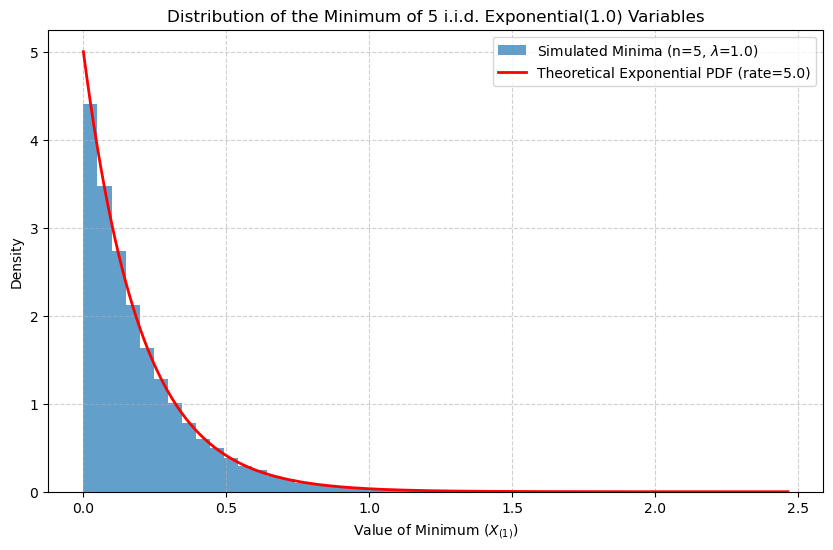

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Simulation Parameters ---
num_simulations = 100000
n_variables = 5  # Number of exponential variables
lambda_rate = 1.0 # Rate parameter for individual variables

# --- Simulate Exponential Random Variables ---
# Generate n_variables sets of exponential random variables
# Each row is a simulation, each column is one X_i
exp_samples = np.random.exponential(scale=1.0/lambda_rate, size=(num_simulations, n_variables))

# --- Calculate the Minimum for each simulation ---
X_min = np.min(exp_samples, axis=1)

# --- Theoretical Distribution ---
# The minimum follows Exponential(n * lambda)
theoretical_rate = n_variables * lambda_rate
theoretical_dist = stats.expon(scale=1.0/theoretical_rate)

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot histogram of simulated minimums
plt.hist(X_min, bins=50, density=True, alpha=0.7, label=f'Simulated Minima (n={n_variables}, $\lambda$={lambda_rate})')

# Plot theoretical PDF
x_values = np.linspace(X_min.min(), X_min.max(), 400)
pdf_values = theoretical_dist.pdf(x_values)
plt.plot(x_values, pdf_values, 'r-', lw=2, label=f'Theoretical Exponential PDF (rate={theoretical_rate:.1f})')

plt.title(f'Distribution of the Minimum of {n_variables} i.i.d. Exponential({lambda_rate}) Variables')
plt.xlabel('Value of Minimum ($X_{(1)}$)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Summary

This chapter introduced methods for finding the distribution of functions of multiple random variables. We specifically looked at:

* **Sums of independent variables:** Using convolution (discrete and continuous cases). We saw important results like the sum of independent Poissons being Poisson and the sum of independent Normals being Normal.
* **Multivariate Transformations:** Using the Jacobian determinant to find the joint PDF of transformed variables, illustrated with the Cartesian-to-Polar transformation.
* **Order Statistics:** Deriving the distributions (CDFs and PDFs) for the minimum ($X_{(1)}$) and maximum ($X_{(n)}$) of an i.i.d. sample.

We used simulations to empirically verify theoretical results, such as the triangular distribution arising from the sum of two uniforms and the exponential distribution arising from the minimum of exponentials. Simulation is a crucial tool when analytical derivations become too complex or intractable.

## Exercises

1.  **Sum of Two Poissons:** Let $X \sim Poisson(2)$ and $Y \sim Poisson(3)$ be independent. 
    a. What is the distribution of $Z = X + Y$?
    b. Calculate $P(Z=4)$.
    c. Simulate $X$ and $Y$ many times, calculate their sum $Z$, and create a histogram of the simulated $Z$ values. Compare the histogram to the theoretical PMF from part (a).
2.  **Maximum of Uniforms:** Let $U_1, U_2, U_3$ be i.i.d. $Uniform(0, 1)$.
    a. Find the theoretical CDF and PDF of $U_{(3)} = \max(U_1, U_2, U_3)$.
    b. Simulate $U_1, U_2, U_3$ many times, find the maximum in each simulation, and create a histogram. Compare it to the theoretical PDF from part (a).
3.  **Ratio of Normals (Cauchy Distribution):** Let $X \sim N(0, 1)$ and $Y \sim N(0, 1)$ be independent. Simulate $X$ and $Y$ many times and compute the ratio $Z = X/Y$. Plot a histogram of the $Z$ values. What distribution does this resemble? (Note: The theoretical distribution is the Cauchy distribution, which has unusual properties like an undefined mean.)